In [42]:
%matplotlib inline

In [15]:
test10k_image_path = './data/t10k-images.idx3-ubyte'
# f = open(test10k_image_path,'rb')

In [20]:
from itertools import islice
with open(test10k_image_path) as myfile:
    head = list(islice(myfile, 10))
head[0]

"\x00\x00\x08\x03\x00\x00'\x10\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00T\xb9\x9f\x97<$\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xde\xfe\xfe\xfe\xfe\xf1\xc

In [4]:
# encoding: utf-8
"""
@author: monitor1379 
@contact: yy4f5da2@hotmail.com
@site: www.monitor1379.com

@version: 1.0
@license: Apache Licence
@file: mnist_decoder.py
@time: 2016/8/16 20:03

对MNIST手写数字数据文件转换为bmp图片文件格式。
数据集下载地址为http://yann.lecun.com/exdb/mnist。
相关格式转换见官网以及代码注释。

========================
关于IDX文件格式的解析规则：
========================
THE IDX FILE FORMAT

the IDX file format is a simple format for vectors and multidimensional matrices of various numerical types.
The basic format is

magic number
size in dimension 0
size in dimension 1
size in dimension 2
.....
size in dimension N
data

The magic number is an integer (MSB first). The first 2 bytes are always 0.

The third byte codes the type of the data:
0x08: unsigned byte
0x09: signed byte
0x0B: short (2 bytes)
0x0C: int (4 bytes)
0x0D: float (4 bytes)
0x0E: double (8 bytes)

The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices....

The sizes in each dimension are 4-byte integers (MSB first, high endian, like in most non-Intel processors).

The data is stored like in a C array, i.e. the index in the last dimension changes the fastest.
"""

import numpy as np
import struct
import matplotlib.pyplot as plt

# 訓練集文件
train_images_idx3_ubyte_file = './data/train-images.idx3-ubyte'
# 訓練集標籤文件
train_labels_idx1_ubyte_file = './data/train-labels.idx1-ubyte'

# 測試集文件
test_images_idx3_ubyte_file = './data/t10k-images.idx3-ubyte'
# 測試集標籤文件
test_labels_idx1_ubyte_file = './data/t10k-labels.idx1-ubyte'


def decode_idx3_ubyte(idx3_ubyte_file):
    """
    解析idx3文件的通用函数
    :param idx3_ubyte_file: idx3文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数、图片数量、每张图片高、每张图片宽
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print '魔数:%d, 图片数量: %d张, 图片大小: %d*%d' % (magic_number, num_images, num_rows, num_cols)

    # 解析数据集
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print '已解析 %d' % (i + 1) + '张'
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images


def decode_idx1_ubyte(idx1_ubyte_file):
    """
    解析idx1文件的通用函数
    :param idx1_ubyte_file: idx1文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数和标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print '魔数:%d, 图片数量: %d张' % (magic_number, num_images)

    # 解析数据集
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print '已解析 %d' % (i + 1) + '张'
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


def load_train_images(idx_ubyte_file=train_images_idx3_ubyte_file):
    """
    TRAINING SET IMAGE FILE (train-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  60000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)


def load_train_labels(idx_ubyte_file=train_labels_idx1_ubyte_file):
    """
    TRAINING SET LABEL FILE (train-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)


def load_test_images(idx_ubyte_file=test_images_idx3_ubyte_file):
    """
    TEST SET IMAGE FILE (t10k-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  10000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)


def load_test_labels(idx_ubyte_file=test_labels_idx1_ubyte_file):
    """
    TEST SET LABEL FILE (t10k-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  10000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)





train_images = load_train_images()
train_labels = load_train_labels()
test_images = load_test_images()
test_labels = load_test_labels()

    # 查看前十个数据及其标签以读取是否正确
#     for i in range(10):
#         print train_labels[i]
#         plt.imshow(train_images[i], cmap='gray')
#         plt.show()
#     print 'done'

# run()

魔数:2051, 图片数量: 60000张, 图片大小: 28*28
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2051, 图片数量: 10000张, 图片大小: 28*28
已解析 10000张
魔数:2049, 图片数量: 10000张
已解析 10000张


In [9]:
print 'shape of train-images:',train_images.shape
print 'shape of train-labels:',train_labels.shape
print 'shape of test-images:',test_images.shape
print 'shape of train-labels:',train_labels.shape

shape of train-images: (60000, 28, 28)
shape of train-labels: (60000,)
shape of test-images: (10000, 28, 28)
shape of train-labels: (60000,)


In [10]:
train_labels[:10]

array([ 5.,  0.,  4.,  1.,  9.,  2.,  1.,  3.,  1.,  4.])

In [20]:
import keras 
np.random.seed(1337) 
from keras.models import Sequential
from keras.layers.core import Dropout,Dense,Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [33]:
X_train = train_images.reshape(train_images.shape[0],28*28)
y_train = np_utils.to_categorical(train_labels,nb_classes=10)
X_test = test_images.reshape(test_images.shape[0],28*28)
y_test = np_utils.to_categorical(test_labels,nb_classes=10)

In [34]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train /= 255
X_test /= 255

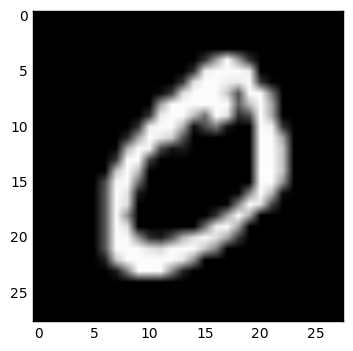

In [46]:
plt.imshow(X_train[1].reshape(28,28),cmap='gray')


In [54]:
def mlp_model():
    model = Sequential()
    model.add(Dense(output_dim=512,input_dim=28*28,activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(output_dim=512,activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))    
    model.summary()
    return model

In [55]:
model = mlp_model()
model.compile(
    loss="categorical_crossentropy",
    optimizer = 'adam',
    metrics=['accuracy']
)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_15 (Dense)                 (None, 512)           401920      dense_input_6[0][0]              
____________________________________________________________________________________________________
dense_16 (Dense)                 (None, 512)           262656      dense_15[0][0]                   
____________________________________________________________________________________________________
dense_17 (Dense)                 (None, 10)            5130        dense_16[0][0]                   
Total params: 669706
____________________________________________________________________________________________________


In [56]:
history = model.fit(X_train,y_train,nb_epoch=10,batch_size=20,verbose=1,
         validation_data = (X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 55s - loss: 0.1825 - acc: 0.9449 - val_loss: 0.0938 - val_acc: 0.9715
Epoch 2/10
60000/60000 [==============================] - 59s - loss: 0.0836 - acc: 0.9743 - val_loss: 0.1090 - val_acc: 0.9663
Epoch 3/10
60000/60000 [==============================] - 54s - loss: 0.0575 - acc: 0.9817 - val_loss: 0.0946 - val_acc: 0.9728
Epoch 4/10
60000/60000 [==============================] - 61s - loss: 0.0477 - acc: 0.9853 - val_loss: 0.0907 - val_acc: 0.9744
Epoch 5/10
60000/60000 [==============================] - 62s - loss: 0.0366 - acc: 0.9883 - val_loss: 0.1085 - val_acc: 0.9731
Epoch 6/10
60000/60000 [==============================] - 63s - loss: 0.0355 - acc: 0.9891 - val_loss: 0.1117 - val_acc: 0.9758
Epoch 7/10
60000/60000 [==============================] - 63s - loss: 0.0307 - acc: 0.9911 - val_loss: 0.1188 - val_acc: 0.9748
Epoch 8/10
60000/60000 [==============================